# Project Overview
TODO

## Data
We are going to use the data from the following link:
https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024
The dataset contains 1,348,454 job listings (rows), scraped from LinkedIn (publicly available listings on https://www.linkedin.com/jobs/) in January 2024.
The job listings were from 4 countries: the United States, the United Kingdom, Canada, and Australia, with following distributions:
- United States: 1,149,342 - 85%
- United Kingdom: 113,421 - 9%
- Canada: 55,972 - 4%
- Australia: 29,719 - 2%

The dataset provides the following files:
- linkedin_job_postings.csv: the job postings with data and metadata (such as company, job location, job title, search criteria, etc.) - 14 columns total (see below), sans summary and skills - ca. 420 MB
- job_skills.csv: the list of skills for each job link, skills are comma-seperated within one column - ca. 670 MB
- job_summary.csv: the summary of each job link - ca. 5.1 GB

While the job_skills and job_summary files each only contain one relevant column each (next to the link, which acts as the key), the job_postings file is more complex and contains the following columns:
- job_link: the link to the job posting - acts as the primary key in the overall dataset - string
- last_processed_time: the time the job posting was last processed during data collection - datetime
- got_summary: whether the job posting has a summary that was successfully extracted during data collection - boolean
- got_ner: indicates whether Named Entity Recognition (NER) was performed on the job posting or not - boolean
- is_being_worked: whether the job posting is currently being worked on - boolean
- job_title: the title of the job listing - string
- company: the company who created the job listing - string
- job_location: the location of the job (city, state, country (only if not US)) - string
- first_seen: the time the job posting was first seen on LinkedIn - datetime
- search_city: city used as a search criterion for collecting the job posting - string
- search_country: country used as a search criterion for collecting the job postings - string
- search_position: position used as a search criterion for collecting the job postings - string
- job_level: the job level of the job - there seem to be only two of these (see below) - string
- job_type: the type of the job (Onsite, Hybrid, Remote, etc. - see below) - string


In [25]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data
job_postings = pd.read_csv('E:/Programming/cu-boulder/machine-learning/Course 1/project/data/linkedin_job_postings.csv')
job_summaries = pd.read_csv('E:/Programming/cu-boulder/machine-learning/Course 1/project/data/job_summary.csv')
job_skills = pd.read_csv('E:/Programming/cu-boulder/machine-learning/Course 1/project/data/job_skills.csv')

In [47]:
# Display the first few rows of the datasets
print("Number of rows for postings: ",job_postings.shape[0])
print(job_postings.head())
print("\n\n\n")
print("Number of rows for summaries: ",job_summaries.shape[0])
print(job_summaries.head())
print("\n\n\n")
print("Number of rows for skills: ", job_skills.shape[0])
print(job_skills.head())

Number of rows for postings:  1348454
                                            job_link  \
0  https://www.linkedin.com/jobs/view/account-exe...   
1  https://www.linkedin.com/jobs/view/registered-...   
2  https://www.linkedin.com/jobs/view/restaurant-...   
3  https://www.linkedin.com/jobs/view/independent...   
4  https://www.linkedin.com/jobs/view/group-unit-...   

             last_processed_time got_summary got_ner is_being_worked  \
0   2024-01-21 07:12:29.00256+00           t       t               f   
1   2024-01-21 07:39:58.88137+00           t       t               f   
2  2024-01-21 07:40:00.251126+00           t       t               f   
3  2024-01-21 07:40:00.308133+00           t       t               f   
4  2024-01-19 09:45:09.215838+00           f       f               f   

                                           job_title  \
0  Account Executive - Dispensing (NorCal/Norther...   
1                 Registered Nurse - RN Care Manager   
2               RESTAURA

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite


We don't have skills but that's fine, we'll just ignore those listings when analysing skills/summaries

## Data Exploration & Cleaning
Let's start by exploring the data and checking for missing values.

In [46]:
print("Job Skills Invalid Values")
print(job_skills.isna().sum())
print("")
print("Job Summaries Invalid Values")
print(job_summaries.isna().sum())
print("")
print("Job Postings Invalid Values")
print(job_postings.isna().sum())

Job Skills Invalid Values
job_link         0
job_skills    2085
dtype: int64

Job Summaries Invalid Values
job_link       0
job_summary    0
dtype: int64

Job Postings Invalid Values
job_link                0
last_processed_time     0
got_summary             0
got_ner                 0
is_being_worked         0
job_title               0
company                11
job_location           19
first_seen              0
search_city             0
search_country          0
search_position         0
job_level               0
job_type                0
dtype: int64


As we can see, most of our data looks quite good.
We will drop the rows with missing values in the job_skills dataset, because they are unuseable for us when they do not include the skills.
We can work with the (very few) missing company and job_location values in the job_postings dataset though, so we'll keep those rows.

In [28]:
# Drop the job_skills rows with missing values
job_skills = job_skills.dropna()

Let's have a look at the different job titles and search positions in the job_postings dataset.

In [29]:
unique_titles = job_postings['job_title'].str.lower().unique()
print("Unique Job Titles: ", len(unique_titles))
print("Unique Job Titles (lower case): ", len(unique_titles))
print(job_postings['job_title'].str.lower().value_counts())
print("\n")

unique_positions = job_postings['search_position'].unique()
print("Unique Search Positions: ", len(unique_positions))
print(job_postings['search_position'].value_counts())

Unique Job Titles:  579066
Unique Job Titles (lower case):  579066
job_title
customer service representative                                                                                                            9436
lead sales associate-ft                                                                                                                    7325
shift manager                                                                                                                              5849
store manager                                                                                                                              5748
assistant manager                                                                                                                          5540
                                                                                                                                           ... 
clinical rn sharp memorial 1w oncology ft night; currently 

As we can see, we have many more unique job titles than search positions (584544 Job Titles vs. 1993 Search Positions).
If we convert the job titles to lower case, we drop by about 5000 to 579066 unique job titles. This also changes the job titles that occur most often (apparently, "Customer Service Representative" was written in different ways and accounted for 4000 more listings when converted to lower case).
Lowercasing search positions does not lead to a change.

It now seems like the "search position" would be a better job indicator than the job title, because the title frequently includes additional info, such as the location ("Survey Crew Chief - Michigan"), the field ("Quality Engineer - Aerospace"), the job level ("Designer 1") or general info ("Employment Attorney with relevant experience"); unfortunately, search position and job title frequently seem to be unrelated, as the examples below show.

In [30]:
print(job_postings.loc[56]['job_title'], " - ", job_postings.loc[56]['search_position'])
print(job_postings.loc[58]['job_title'], " - ", job_postings.loc[58]['search_position'])
print(job_postings.loc[64]['job_title'], " - ", job_postings.loc[64]['search_position'])
print(job_postings.loc[91]['job_title'], " - ", job_postings.loc[91]['search_position'])
print(job_postings.loc[124]['job_title'], " - ", job_postings.loc[124]['search_position'])
print(job_postings.loc[164]['job_title'], " - ", job_postings.loc[164]['search_position'])
print(job_postings.loc[177]['job_title'], " - ", job_postings.loc[177]['search_position'])

Designer I  -  Tattoo Artist
Regional Sales Manager, Mid-Atlantic  -  Director Of Religious Activities
Surgical Sales Representative  -  Handle Maker
Keyholder  -  Reader
Lead Software Engineer, Back End  -  Job Development Specialist
RN - Registered Nurse - 24060503EXPPLAT  -  Driver
Android Engineer  -  Tool Grinder Ii


## Let's take a look at the top 10 job titles, search positions, locations, and companies:

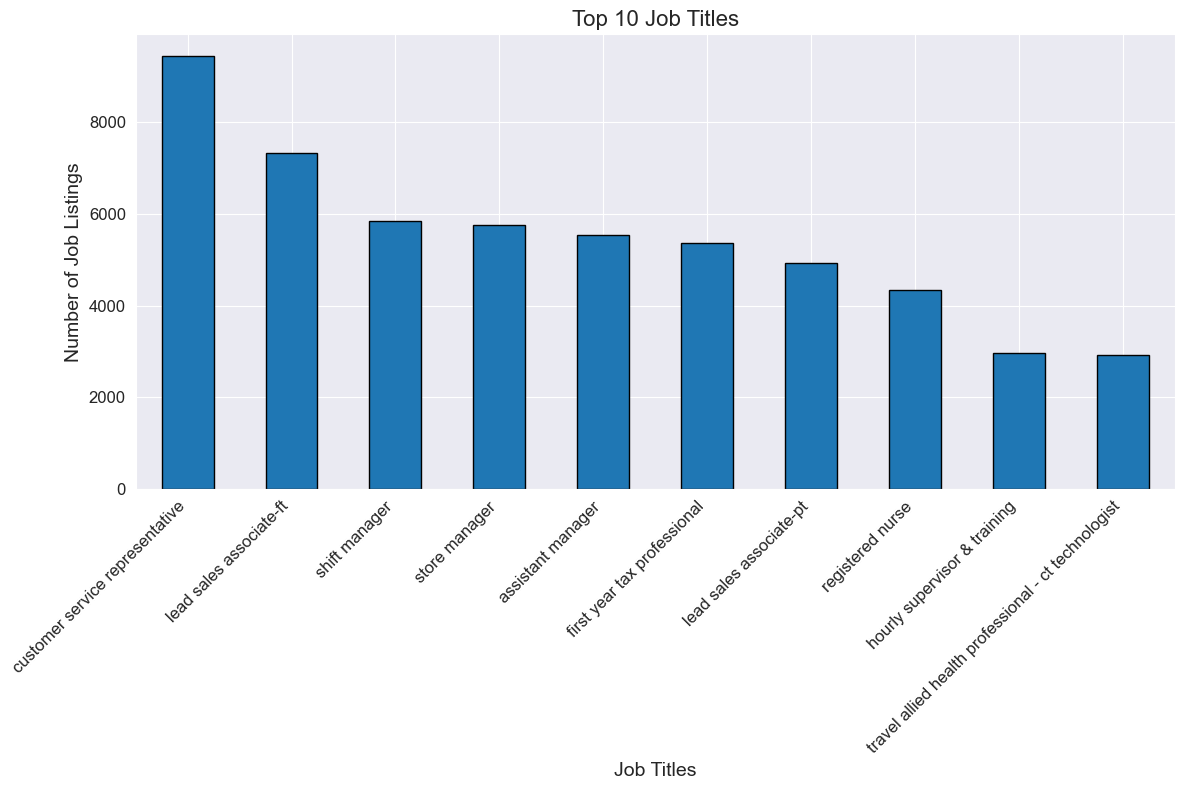

In [31]:
plt.figure(figsize=(12, 8))

top_job_titles = job_postings['job_title'].str.lower().value_counts().head(10)
top_job_titles.plot(kind='bar', edgecolor='black')

plt.title('Top 10 Job Titles', fontsize=16)
plt.xlabel('Job Titles', fontsize=14)
plt.ylabel('Number of Job Listings', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

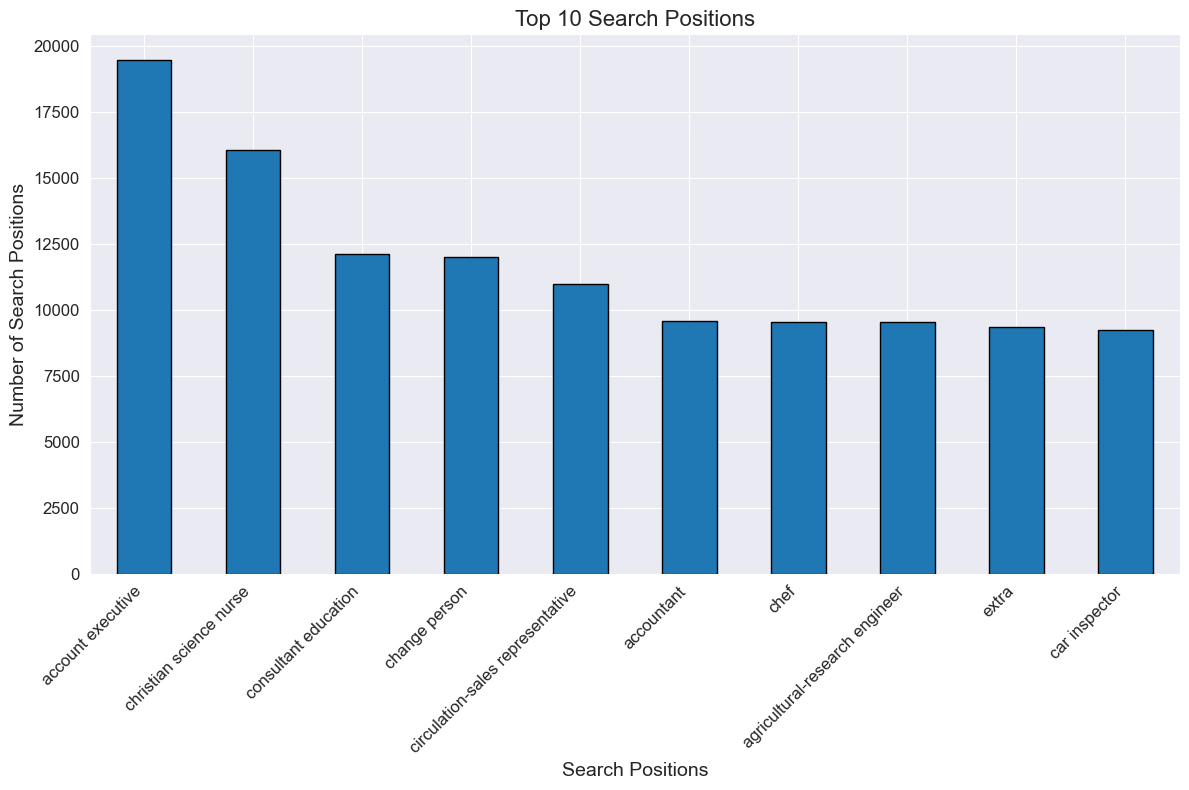

In [32]:
plt.figure(figsize=(12, 8))

top_job_titles = job_postings['search_position'].str.lower().value_counts().head(10)
top_job_titles.plot(kind='bar', edgecolor='black')

plt.title('Top 10 Search Positions', fontsize=16)
plt.xlabel('Search Positions', fontsize=14)
plt.ylabel('Number of Search Positions', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

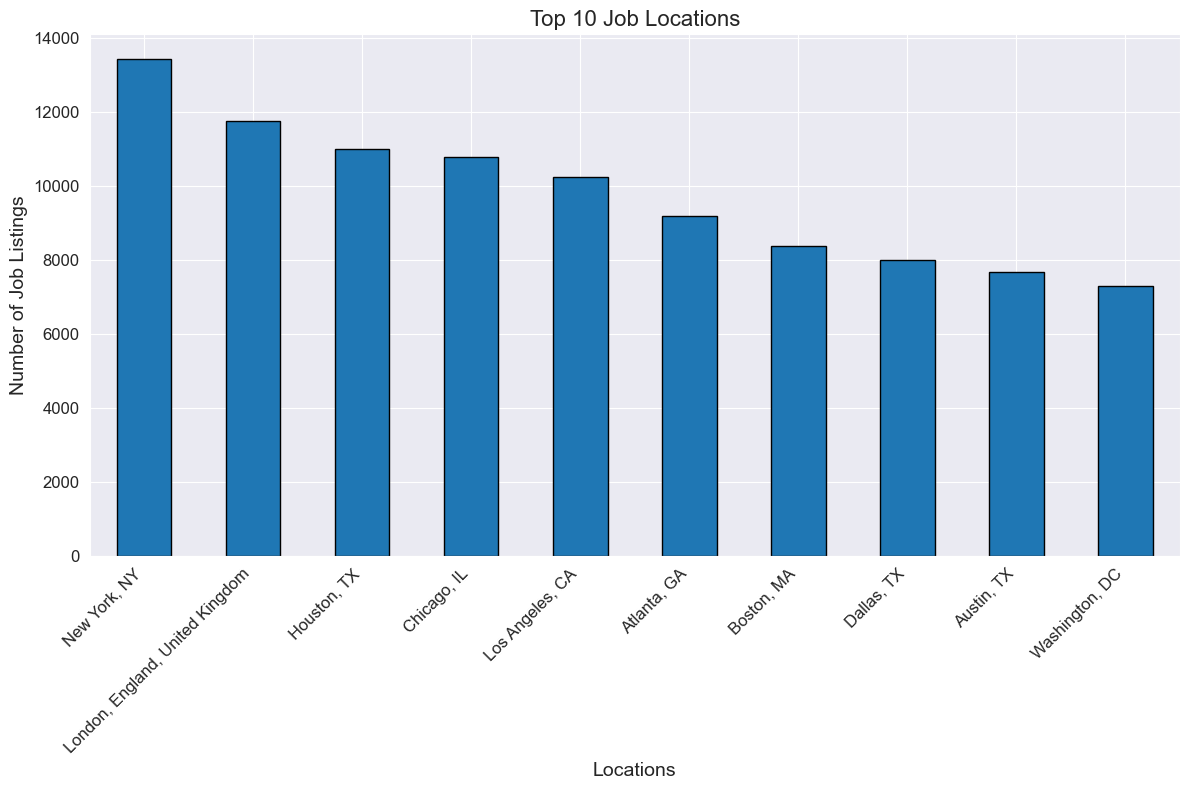

In [33]:
plt.figure(figsize=(12, 8))

top_locations = job_postings['job_location'].value_counts().head(10)
top_locations.plot(kind='bar', edgecolor='black')

plt.title('Top 10 Job Locations', fontsize=16)
plt.xlabel('Locations', fontsize=14)
plt.ylabel('Number of Job Listings', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

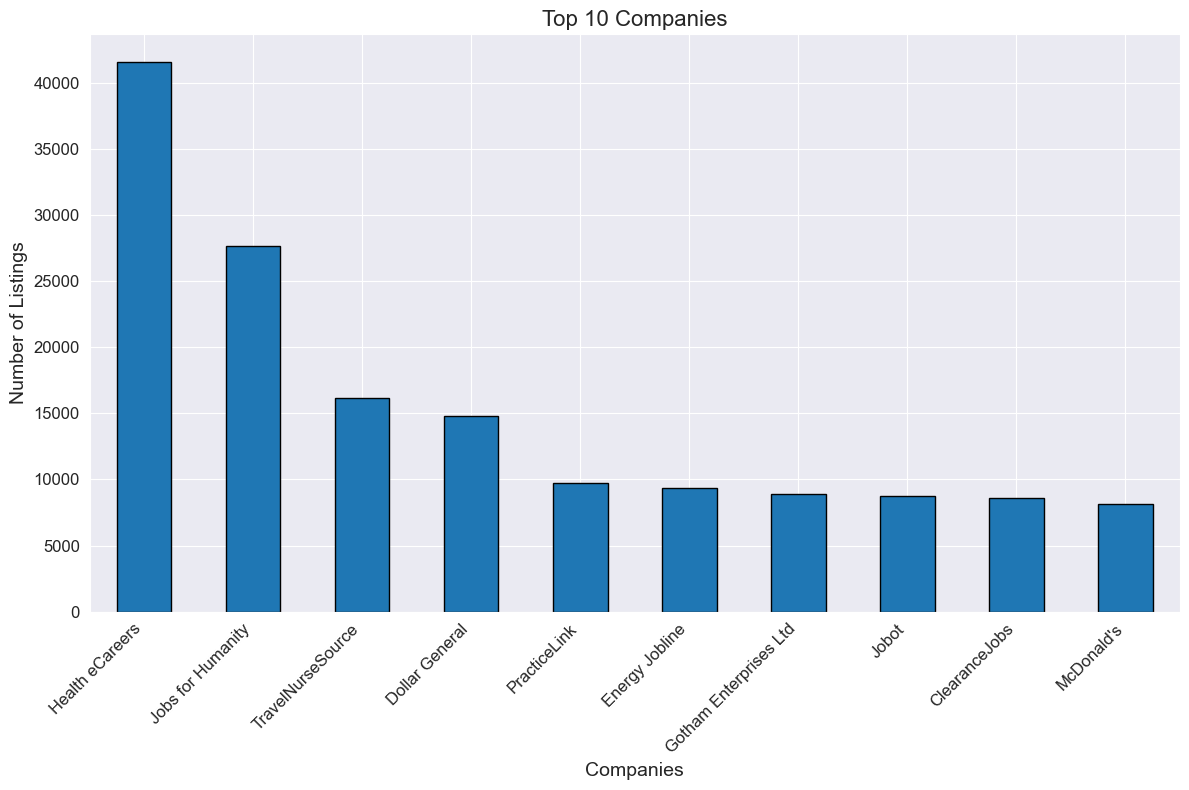

In [34]:
plt.figure(figsize=(12, 8))

top_locations = job_postings['company'].value_counts().head(10)
top_locations.plot(kind='bar', edgecolor='black')

plt.title('Top 10 Companies', fontsize=16)
plt.xlabel('Companies', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Job Level Distribution
Let's see how the job levels are distributed.

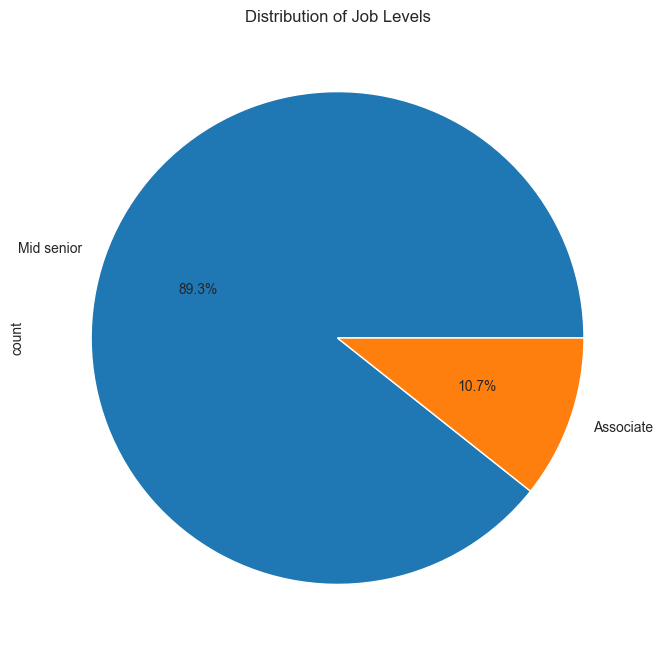

In [35]:
job_level_distribution = job_postings['job_level'].value_counts()
job_level_distribution.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Distribution of Job Levels')
plt.show()

Only "Mid senior" and "Associate" - that doesn't tell us much, so we might as well ignore/drop this column.

## How about "Job Types"?

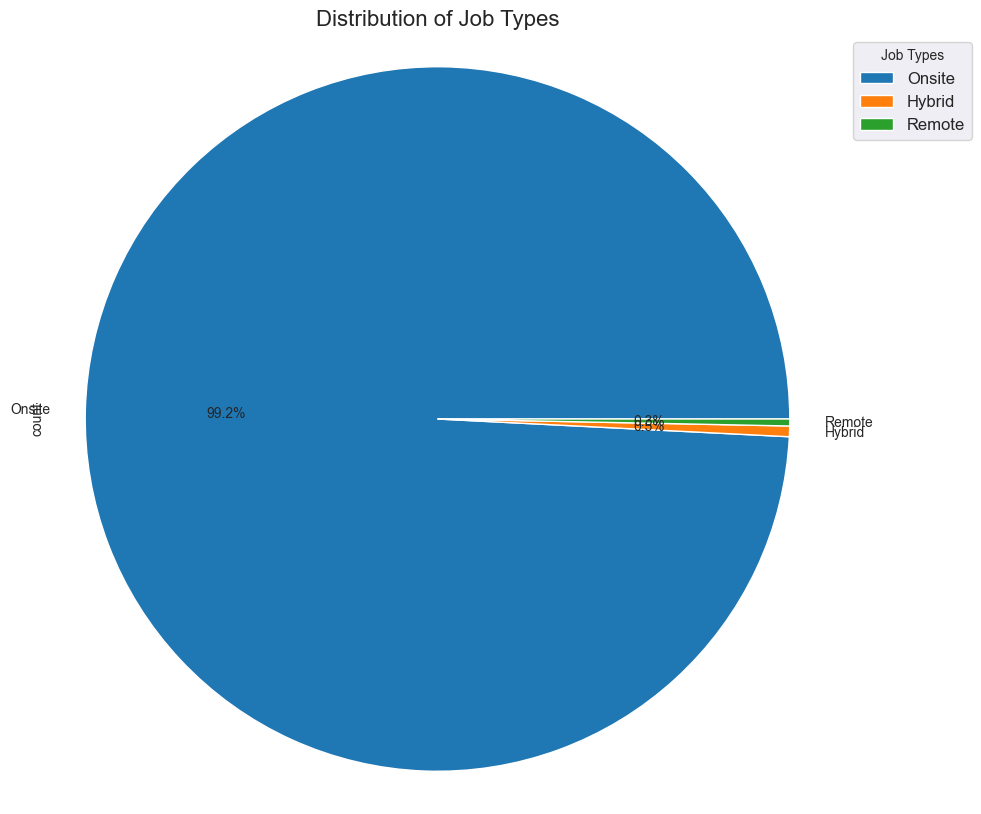

In [36]:
plt.figure(figsize=(10, 10))

job_type_distribution = job_postings['job_type'].value_counts()
job_type_distribution.plot(kind='pie', autopct='%1.1f%%')

plt.title('Distribution of Job Types', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(job_type_distribution.index, title='Job Types', loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=12)
plt.show()

In [37]:
job_postings.head()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite


# Data Preprocessing
Now let's drop some columns that we won't need for our analysis: last_processed_time, got_summary, got_ner, is_being_worked, first_seen and job_level.

In [38]:
job_postings = job_postings.drop(columns=['last_processed_time', 'got_summary', 'got_ner', 'is_being_worked', 'first_seen', 'job_level'])

In [39]:
job_postings.head()

,job_link,job_title,company,job_location,search_city,search_country,search_position,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",Coronado,United States,Color Maker,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",Grand Haven,United States,Director Nursing Service,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",Tooele,United States,Stand-In,Onsite
3,https://www.linkedin.com/jobs/view/independent...,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",Pinehurst,United States,Real-Estate Clerk,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",Gadsden,United States,Supervisor Travel-Information Center,Onsite
